In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

<p>Generate synthetic data</p>

In [3]:
np.random.seed(42)

temp = np.array([round(np.random.choice(np.linspace(150, 300, 2000)), 2) for _ in range(500)])
time = np.array([round(np.random.choice(np.linspace(10, 15, 200)), 2) for _ in range(500)])
X = np.column_stack((temp, time))
print(X[:20, :])
print(X.shape)

[[234.49  11.33]
 [259.48  11.43]
 [214.53  11.66]
 [247.1   12.59]
 [234.79  14.35]
 [232.17  10.58]
 [279.36  12.84]
 [228.34  10.78]
 [272.91  14.37]
 [159.08  12.14]
 [184.97  13.77]
 [242.9   14.85]
 [174.76  13.17]
 [261.21  13.87]
 [156.53  13.24]
 [254.75  10.4 ]
 [234.27  12.59]
 [215.36  14.02]
 [276.59  13.42]
 [159.75  11.06]]
(500, 2)


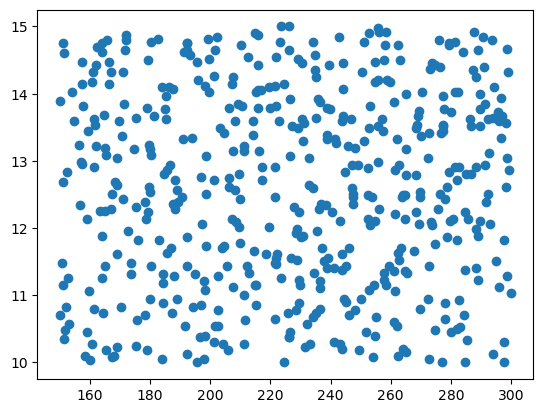

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

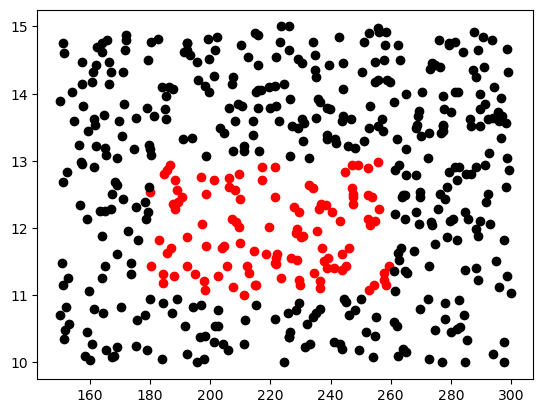

In [5]:
good = []
bad = []

for row in X:
    if 180<row[0]<260 and 11<row[1]<13:
        good.append(row)
    else:
        bad.append(row)
        
good = np.array(good)
bad = np.array(bad)

plt.scatter(good[:, 0], good[:, 1], color="red")
plt.scatter(bad[:, 0], bad[:, 1], color="black")
plt.show()


In [6]:
Y1 = np.ones((len(good), 1))
Y2 = np.zeros((len(bad), 1))

good = np.hstack((good, Y1))
bad = np.hstack((bad, Y2))
data = np.vstack((good, bad))
print(data[:20, :])

[[234.49  11.33   1.  ]
 [259.48  11.43   1.  ]
 [214.53  11.66   1.  ]
 [247.1   12.59   1.  ]
 [234.27  12.59   1.  ]
 [257.83  11.23   1.  ]
 [221.66  11.48   1.  ]
 [238.84  11.41   1.  ]
 [185.57  12.86   1.  ]
 [188.27  12.29   1.  ]
 [221.81  11.56   1.  ]
 [245.07  11.43   1.  ]
 [212.36  11.43   1.  ]
 [236.59  11.21   1.  ]
 [198.47  11.73   1.  ]
 [213.03  11.33   1.  ]
 [247.32  12.51   1.  ]
 [195.02  11.31   1.  ]
 [208.23  12.56   1.  ]
 [217.31  12.71   1.  ]]


In [7]:
np.random.shuffle(data)
print(data[:20, :])

[[209.8   11.78   1.  ]
 [263.68  12.46   0.  ]
 [295.95  13.59   0.  ]
 [198.17  11.08   1.  ]
 [297.75  10.     0.  ]
 [289.72  13.77   0.  ]
 [232.84  13.04   0.  ]
 [185.57  12.86   1.  ]
 [171.61  14.65   0.  ]
 [178.44  10.7    0.  ]
 [197.95  10.05   0.  ]
 [208.15  13.59   0.  ]
 [159.75  11.06   0.  ]
 [246.87  13.62   0.  ]
 [284.47  10.7    0.  ]
 [241.17  11.41   1.  ]
 [179.04  10.18   0.  ]
 [291.07  14.4    0.  ]
 [236.44  10.8    0.  ]
 [284.69  12.24   0.  ]]


In [8]:
X = data[:, :2]
Y = data[:, 2:]
print(X.shape)
print(Y.shape)

(500, 2)
(500, 1)


In [9]:
X_train = X[:350, :]
Y_train = Y[:350]
X_cross = X[350:400, :]
Y_cross = Y[350:400]
X_test = X[400:, :]
Y_test = X[400:]
print(X_train.shape)
print(Y_train.shape)
print(X_cross.shape)
print(Y_cross.shape)
print(X_test.shape)
print(Y_test.shape)

(350, 2)
(350, 1)
(50, 2)
(50, 1)
(100, 2)
(100, 2)


In [10]:
def print_cost(epoch, logs):
    if epoch % 100 == 0:
        print("Epoch {}: Cost: {:.4f}".format(epoch, logs["loss"]))

In [60]:
model = Sequential([
    
    Dense(units=2, activation="relu"),
    Dense(units=4, activation="relu"),
    Dense(units=3, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy())
cost_ = LambdaCallback(on_epoch_end=print_cost)

model.fit(X_train, Y_train, epochs=2000, verbose=0, callbacks=[cost_])

2024-02-02 20:23:02.469045: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-02 20:23:02.841171: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ff6d6d2bd60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-02 20:23:02.841192: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-02 20:23:02.850075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-02 20:23:02.876488: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1706901782.935703   29067 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Epoch 0: Cost: 48.2688
Epoch 100: Cost: 0.5303
Epoch 200: Cost: 0.5284
Epoch 300: Cost: 0.5196
Epoch 400: Cost: 0.5227
Epoch 500: Cost: 0.5382
Epoch 600: Cost: 0.5212
Epoch 700: Cost: 0.5167
Epoch 800: Cost: 0.5181
Epoch 900: Cost: 0.5175
Epoch 1000: Cost: 0.5133
Epoch 1100: Cost: 0.5158
Epoch 1200: Cost: 0.5291
Epoch 1300: Cost: 0.5283
Epoch 1400: Cost: 0.5279
Epoch 1500: Cost: 0.5203
Epoch 1600: Cost: 0.5114
Epoch 1700: Cost: 0.5122
Epoch 1800: Cost: 0.5113
Epoch 1900: Cost: 0.5281


In [63]:
cross_predict = model.predict(X_cross)
cross_predict = [1 if pre>=0.5 else 0 for pre in cross_predict]
print(cross_predict)

2/2 [==============================] - 0s 2ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<p> Normalize the data </p>

In [11]:
X1 = data[:, 0]
X2 = data[:, 1]
Y = data[:, 2]
X_1 = (X1 - np.mean(X1)) / np.std(X1)
X_2 = (X2 - np.mean(X2)) / np.std(X2)
X = np.column_stack((X_1, X_2))
print(X[:20, :])

[[-0.41212808 -0.55341647]
 [ 0.84851869 -0.07946972]
 [ 1.6035497   0.70811826]
 [-0.68423873 -1.04130283]
 [ 1.64566485 -1.79404178]
 [ 1.45778449  0.83357475]
 [ 0.12694582  0.32477898]
 [-0.97904476  0.19932249]
 [-1.30567113  1.44691761]
 [-1.14586754 -1.30615542]
 [-0.68938613 -1.75919276]
 [-0.45073363  0.70811826]
 [-1.58316316 -1.05524244]
 [ 0.45521     0.72902768]
 [ 1.33494865 -1.30615542]
 [ 0.32184536 -0.81129926]
 [-1.13182916 -1.66858529]
 [ 1.48937085  1.27267248]
 [ 0.21117611 -1.23645737]
 [ 1.34009605 -0.23280543]]


In [26]:
X_train = X[:350, :]
Y_train = Y[:350]
X_cross = X[350:400, :]
Y_cross = Y[350:400]
X_test = X[400:, :]
Y_test = Y[400:]
print(X_train[:20, :])

[[-0.41212808 -0.55341647]
 [ 0.84851869 -0.07946972]
 [ 1.6035497   0.70811826]
 [-0.68423873 -1.04130283]
 [ 1.64566485 -1.79404178]
 [ 1.45778449  0.83357475]
 [ 0.12694582  0.32477898]
 [-0.97904476  0.19932249]
 [-1.30567113  1.44691761]
 [-1.14586754 -1.30615542]
 [-0.68938613 -1.75919276]
 [-0.45073363  0.70811826]
 [-1.58316316 -1.05524244]
 [ 0.45521     0.72902768]
 [ 1.33494865 -1.30615542]
 [ 0.32184536 -0.81129926]
 [-1.13182916 -1.66858529]
 [ 1.48937085  1.27267248]
 [ 0.21117611 -1.23645737]
 [ 1.34009605 -0.23280543]]


In [14]:
model = Sequential([
    tensorflow.keras.Input(shape=(2,)),
    Dense(units=2, activation="relu"),
    Dense(units=4, activation="relu"),
    Dense(units=3, activation="relu"),
    Dense(units=1, activation="sigmoid")
])

model.compile(optimizer=Adam(learning_rate=0.01), loss=BinaryCrossentropy())
cost_ = LambdaCallback(on_epoch_end=print_cost)

model.fit(X_train, Y_train, epochs=2000, verbose=0, callbacks=[cost_])

2024-02-02 21:14:19.790592: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 21:14:19.818355: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 21:14:19.818511: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Epoch 0: Cost: 0.5676
Epoch 100: Cost: 0.1793
Epoch 200: Cost: 0.1541
Epoch 300: Cost: 0.1550
Epoch 400: Cost: 0.1465
Epoch 500: Cost: 0.1397
Epoch 600: Cost: 0.1370
Epoch 700: Cost: 0.1353
Epoch 800: Cost: 0.1356
Epoch 900: Cost: 0.1297
Epoch 1000: Cost: 0.1254
Epoch 1100: Cost: 0.1190
Epoch 1200: Cost: 0.1108
Epoch 1300: Cost: 0.1065
Epoch 1400: Cost: 0.0970
Epoch 1500: Cost: 0.1245
Epoch 1600: Cost: 0.0763
Epoch 1700: Cost: 0.0724
Epoch 1800: Cost: 0.0773
Epoch 1900: Cost: 0.1160


In [15]:
cross_predict = model.predict(X_cross)
cross_predict = [1 if pre>=0.5 else 0 for pre in cross_predict]
print(cross_predict)

2/2 [==============================] - 0s 2ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [17]:
accuracy = np.sum([1 if i==j else 0 for i,j in zip(cross_predict, Y_cross)])/len(Y_cross)
print(accuracy)

0.9


In [27]:
test_predict = model.predict(X_test)
test_predict = [1 if pre>=0.5 else 0 for pre in test_predict]
print(test_predict)

4/4 [==============================] - 0s 2ms/step
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]


In [28]:
accuracy = np.sum([1 if i==j else 0 for i,j in zip(test_predict, Y_test)])/len(Y_test)
print(accuracy)

0.94


313/313 [==============================] - 0s 1ms/step


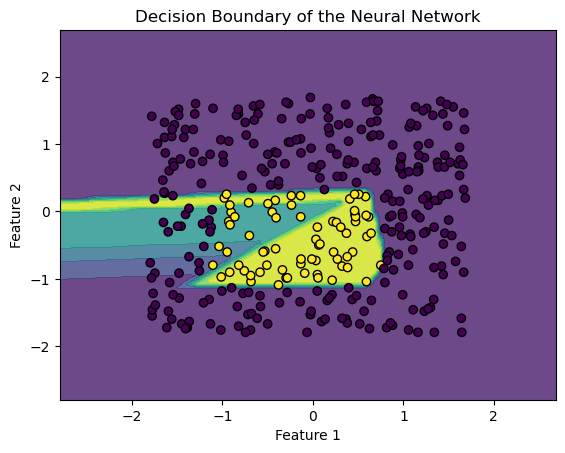

In [30]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Step 2: Use the trained model to make predictions on these points
input_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(input_points)

# Step 3: Visualize the decision boundary
plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap='viridis', alpha=0.8)

# Scatter plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis', edgecolors='k')

plt.title('Decision Boundary of the Neural Network')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
